# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [258]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [259]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [260]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# city_url = f"{url}appid={weather_api_key}&units={units}&q="
# city_url = url + "appid=" + weather_api_key + "&q=" + city

# city_url


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = url + "appid=" + weather_api_key + "&q=" + city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #Converting the date into a yy/mm/dd format
        city_date_conversion = datetime.utcfromtimestamp(city_date).strftime('%y/%m/%d')


        # Append the City information into city_data list    
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date_conversion})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shahr-e babak
http://api.openweathermap.org/data/2.5/weather?q=shahr-e babak&appid=1985bb751beafaac659fd1a1284685aa&units=imperial
{'coord': {'lon': 55.1186, 'lat': 30.1165}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 83.61, 'feels_like': 80.83, 'temp_min': 83.61, 'temp_max': 83.61, 'pressure': 1007, 'humidity': 15, 'sea_level': 1007, 'grnd_level': 821}, 'visibility': 10000, 'wind': {'speed': 14.27, 'deg': 71, 'gust': 24.25}, 'clouds': {'all': 41}, 'dt': 1690060119, 'sys': {'country': 'IR', 'sunrise': 1690075945, 'sunset': 1690125553}, 'timezone': 12600, 'id': 115781, 'name': 'Shahr-e Bābak', 'cod': 200}
Processing Record 2 of Set 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar del plata&appid=1985bb751beafaac659fd1a1284685aa&units=imperial
{'coord': {'lon': -57.5575, 'lat': -38.0023}, '

In [261]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [262]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shahr-e babak,30.1165,55.1186,83.61,15,41,14.27,IR,23/07/22
1,mar del plata,-38.0023,-57.5575,54.09,91,100,11.50,AR,23/07/22
2,talnakh,69.4865,88.3972,62.24,96,100,5.84,RU,23/07/22
3,copala,16.6500,-98.9833,88.29,60,45,7.78,MX,23/07/22
4,adamstown,-25.0660,-130.1015,69.44,67,21,17.87,PN,23/07/22


In [263]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [264]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shahr-e babak,30.1165,55.1186,83.61,15,41,14.27,IR,23/07/22
1,mar del plata,-38.0023,-57.5575,54.09,91,100,11.50,AR,23/07/22
2,talnakh,69.4865,88.3972,62.24,96,100,5.84,RU,23/07/22
3,copala,16.6500,-98.9833,88.29,60,45,7.78,MX,23/07/22
4,adamstown,-25.0660,-130.1015,69.44,67,21,17.87,PN,23/07/22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

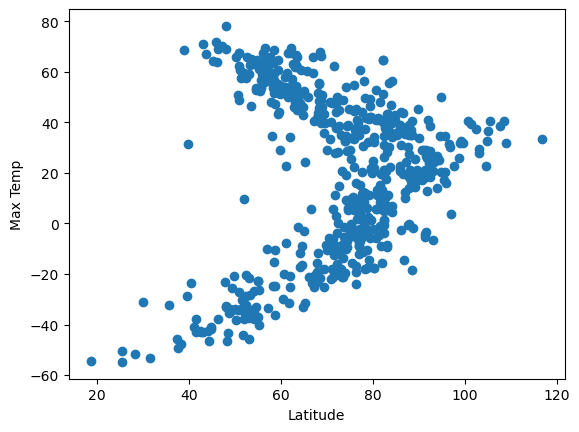

In [265]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'], marker="o")

# Incorporate the other graph properties
# plt.title("Temperature in World Cities")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
# plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

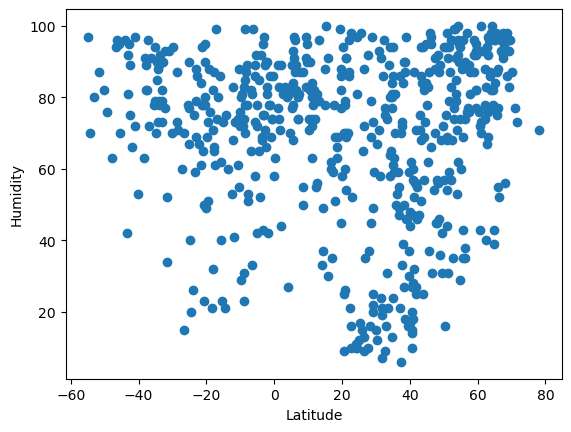

In [266]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

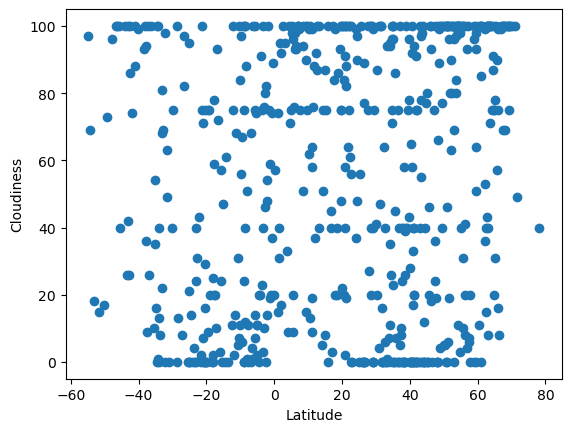

In [267]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

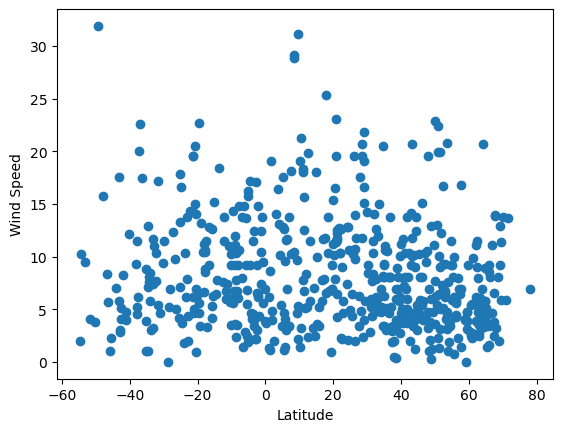

In [268]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [307]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

In [308]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<=0,:])

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,54.09,91,100,11.50,AR,23/07/22
4,adamstown,-25.0660,-130.1015,69.44,67,21,17.87,PN,23/07/22
5,puerto natales,-51.7236,-72.4875,28.40,87,15,4.09,CL,23/07/22
7,touros,-5.1989,-35.4608,77.74,78,2,15.75,BR,23/07/22
9,ushuaia,-54.8000,-68.3000,25.47,97,97,1.95,AR,23/07/22


In [309]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>0, :])

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shahr-e babak,30.1165,55.1186,83.61,15,41,14.27,IR,23/07/22
2,talnakh,69.4865,88.3972,62.24,96,100,5.84,RU,23/07/22
3,copala,16.6500,-98.9833,88.29,60,45,7.78,MX,23/07/22
6,iskateley,67.6803,53.1512,50.99,95,100,13.82,RU,23/07/22
8,stanley,54.8680,-1.6985,59.29,94,100,11.50,GB,23/07/22


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.744114512136597


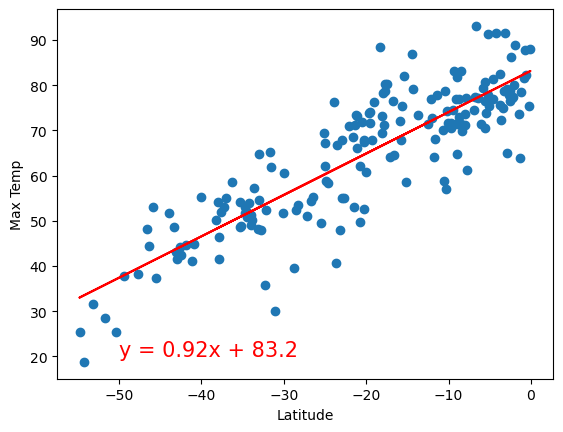

In [310]:
# Linear regression on Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']
regress_values, line_eq, rvalue = create_linear_regression_plot(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3744252743368259


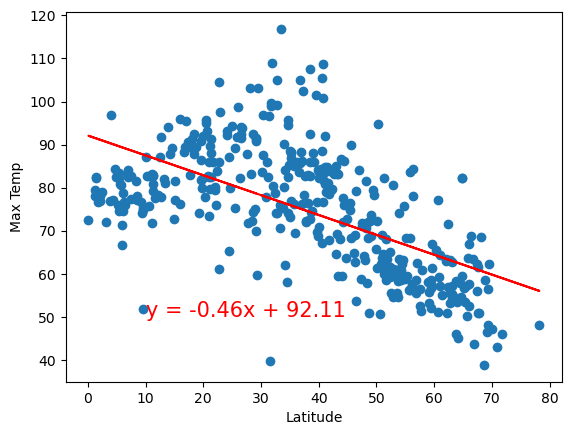

In [311]:
# Linear regression on Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']
regress_values, line_eq, rvalue = create_linear_regression_plot(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

The data shows that only a very small percentage of the variance in the dependent variable (y-values) is explained by the independent variable (x-values) in the linear regression model. 

This suggests that the model doesn't do a good job of capturing the underlying pattern or trend in the data. The data points are  scattered around the regression line with a lot of variability.

The data also shows us that closer we get to the southern hemisphere the lower the temperatures get and the closer we get to the northern hemisphere the higher the temperatures get, which makes sense with what we know about the northern hemisphere receiving more sunlight during the summer months. 

The temperature can however be impacted by proximity to water large bodies of water, ocean curretns and local geography, so that might explain why there correlation between latitude and temperature is not big.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.028803708069903986


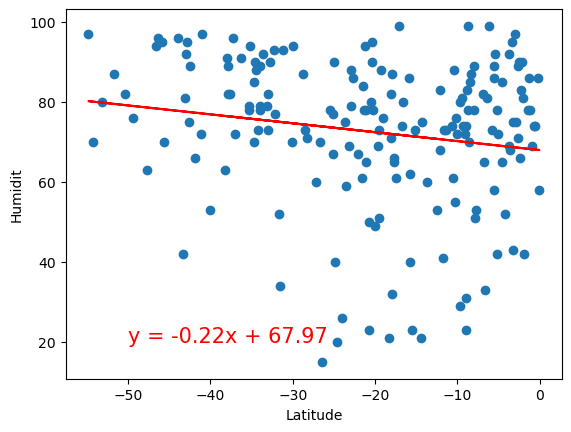

In [312]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']
regress_values, line_eq, rvalue = create_linear_regression_plot(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidit')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01646609341842064


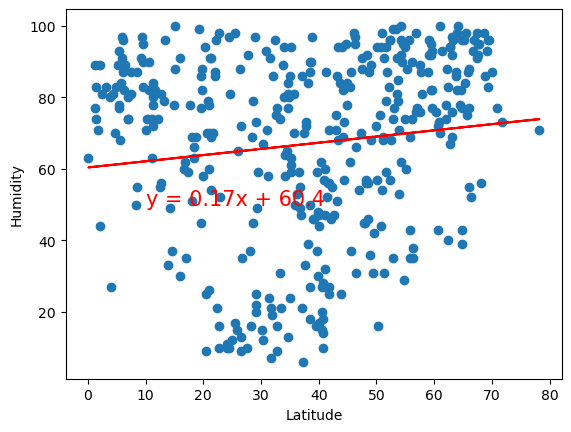

In [313]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']
regress_values, line_eq, rvalue = create_linear_regression_plot(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**

The data shows that only a very small percentage of the variance in the dependent variable (y-values) is explained by the independent variable (x-values) in the linear regression model. 

This suggests that the model doesn't do a good job of capturing the underlying pattern or trend in the data. The data points are  scattered around the regression line with a lot of variability.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.028760935378296642


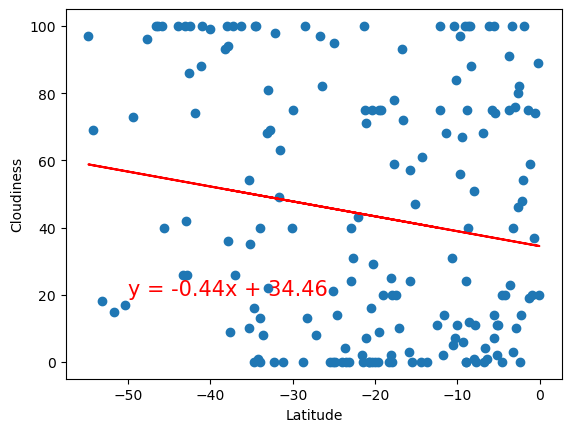

In [314]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']
regress_values, line_eq, rvalue = create_linear_regression_plot(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3744252743368259


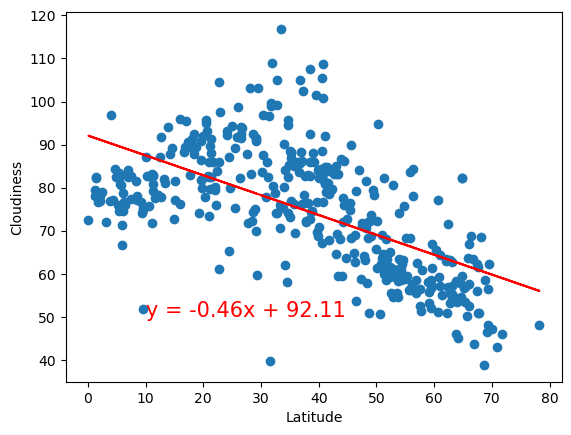

In [315]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']
regress_values, line_eq, rvalue = create_linear_regression_plot(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

The data shows that only a very small percentage of the variance in the dependent variable (y-values) is explained by the independent variable (x-values) in the linear regression model. 

This suggests that the model doesn't do a good job of capturing the underlying pattern or trend in the data. The data points are  scattered around the regression line with a lot of variability.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 2.514248734473232e-06


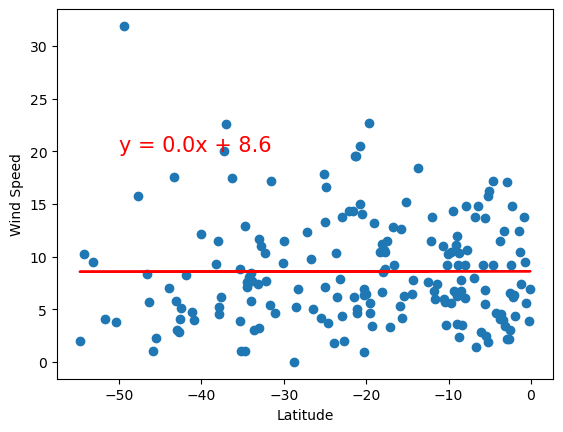

In [316]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']
regress_values, line_eq, rvalue = create_linear_regression_plot(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04962993127419859


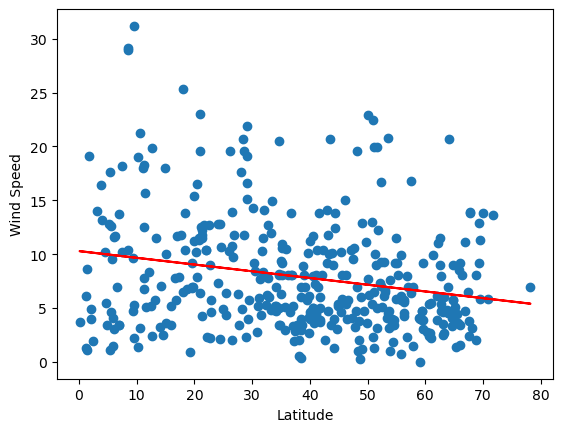

In [317]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']
regress_values, line_eq, rvalue = create_linear_regression_plot(x_values, y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

The data shows that only a very small percentage of the variance in the dependent variable (y-values) is explained by the independent variable (x-values) in the linear regression model. 

This suggests that the model doesn't do a good job of capturing the underlying pattern or trend in the data. The data points are  scattered around the regression line with a lot of variability.

The data also shows us that the higher the latitute, the faster the wind speeds, which make sesnse given what we know about the effects of atmosphere pressure and temperature differences in higher altitudes. As air moves from areas of high pressure to low pressure, it creates wind. At higher altitudes, the air pressure is generally lower than at lower altitudes. This difference in pressure creates a pressure gradient force that drives air from higher pressure areas to lower pressure areas, resulting in wind.